# Regressions - The Ultimate Notebook

### Imports

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### The Dataset

In [9]:
df = pd.read_csv("regression.csv", low_memory=True, sep=";")

In [7]:
#display(df)

## 1) autosklearn Regression

[(1.000000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'regressor:__choice__': 'extra_trees', 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.7010465420634562, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.19032833128592427, 'feature_preprocessor:feature_agglomeration:affinity': 'euclidean', 'feature_preprocessor:feature_agglomeration:linkage': 'ward', 'feature_preprocessor:feature_agglomeration:n_clusters': 31, 'feature_preprocessor:feature_agglomeration:pooling_func': 'max', 'regressor:extra_trees:bootstrap': 'False', 'regressor:extra_trees:criteri

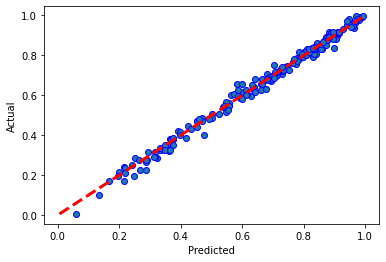

Histogram Errors :


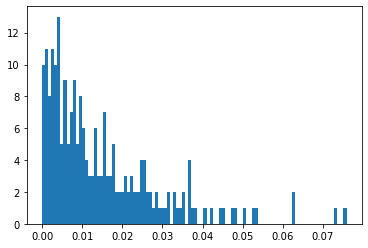

In [12]:
import autosklearn.regression

y = df['Inconnues']
X = df.drop("Inconnues", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =1)

automl = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task = 30, ensemble_size=1)
automl.fit(X_train, y_train)
y_pred = automl.predict(X_test)

print(automl.show_models())
print("------------------------------------------------------")
print(automl.sprint_statistics())
print("------------------------------------------------------")
print("R2:",r2_score(y_test, y_pred))
print("------------------------------------------------------")
print("MAE (Median Absolute Error): ", median_absolute_error(y_test, y_pred))
print("------------------------------------------------------")
print("MAE (Mean Absolute Error): ", mean_absolute_error(y_test, y_pred))
print("MAPE (Mean Absolute Percentage Error): ", mean_absolute_percentage_error(y_test, y_pred))
print("MSE (Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=True))
print("RMSE (Root Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=False))
print("------------------------------------------------------")
print("Max Error: ", max_error(y_test, y_pred))
print("")
print("Actual vs Predicted:")
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

print("Histogram Errors :")
err_hist = np.abs(y_test - y_pred)
plt.hist(err_hist, bins=100)
plt.show()

## 2) Linear Regression

------------------------------------------------------
R2: 0.9960382269855985
------------------------------------------------------
MAE (Median Absolute Error):  0.00820268406135713
------------------------------------------------------
MAE (Mean Absolute Error):  0.010935843229519097
MAPE (Mean Absolute Percentage Error):  0.05895526571764068
------------------------------------------------------
MSE (Mean Square Error):  0.00020851505471571746
RMSE (Root Mean Square Error):  0.014440050370954994
------------------------------------------------------
Max Error:  0.04996012390814952
------------------------------------------------------
Actual vs Predicted :


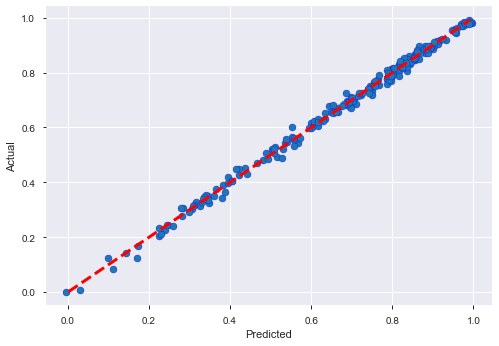

Histogram Errors :


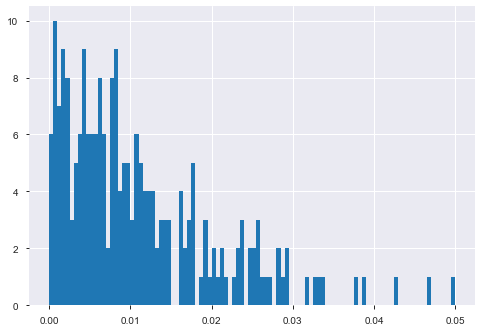

In [71]:
from sklearn.linear_model import LinearRegression

y=df['Inconnues']
X=df.drop("Inconnues", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("------------------------------------------------------")
print("R2:",r2_score(y_test, y_pred))
print("------------------------------------------------------")
print("MAE (Median Absolute Error): ", median_absolute_error(y_test, y_pred))
print("------------------------------------------------------")
print("MAE (Mean Absolute Error): ", mean_absolute_error(y_test, y_pred))
print("MAPE (Mean Absolute Percentage Error): ", mean_absolute_percentage_error(y_test, y_pred))
print("------------------------------------------------------")
print("MSE (Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=True))
print("RMSE (Root Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=False))
print("------------------------------------------------------")
print("Max Error: ", max_error(y_test, y_pred))
print("------------------------------------------------------")

print("Actual vs Predicted :")
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

print("Histogram Errors :")
err_hist = np.abs(y_test - y_pred)
plt.hist(err_hist, bins=100)
plt.show()

In [ ]:
qqplot


## 3) K-NN

------------------------------------------------------
R2: 0.9215205476142668
MAE (Mean Absolute Error):  0.04535148438636365
MAPE (Mean Absolute Percentage Error):  0.1556275712394749
MSE (Mean Square Error):  0.003808987525547239
RMSE (Root Mean Square Error):  0.061716995435189805
Max Error:  0.220242102

Actual vs Predicted:


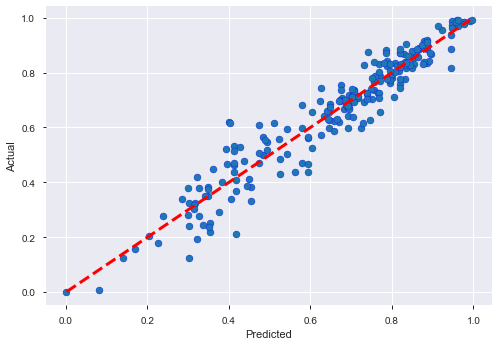

------------------------------------------------------
R2: 0.9416161283791163
MAE (Mean Absolute Error):  0.03902235670454546
MAPE (Mean Absolute Percentage Error):  0.23311170244729712
MSE (Mean Square Error):  0.0028336517640829553
RMSE (Root Mean Square Error):  0.05323205579425761
Max Error:  0.21195754899999997

Actual vs Predicted:


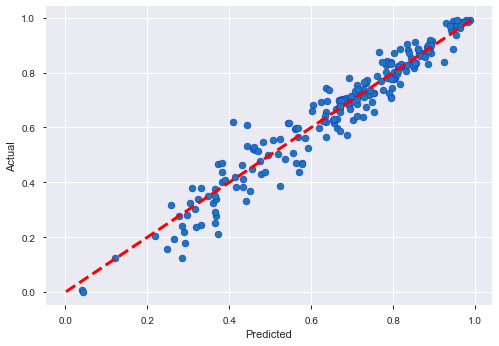

------------------------------------------------------
R2: 0.9414684741678548
MAE (Mean Absolute Error):  0.04066005326666666
MAPE (Mean Absolute Percentage Error):  0.3240111794072945
MSE (Mean Square Error):  0.00284081813733981
RMSE (Root Mean Square Error):  0.05329932586196386
Max Error:  0.21100404566666664

Actual vs Predicted:


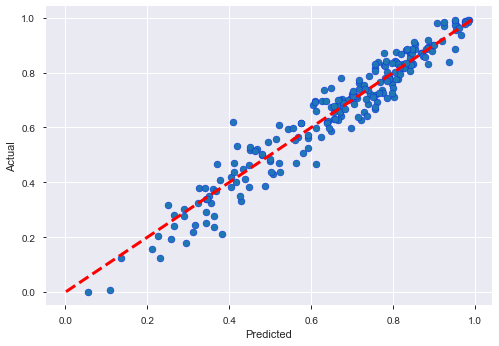

------------------------------------------------------
R2: 0.9445951133828479
MAE (Mean Absolute Error):  0.03845994448636364
MAPE (Mean Absolute Percentage Error):  0.4825909230503664
MSE (Mean Square Error):  0.0026890672088514256
RMSE (Root Mean Square Error):  0.051856216684708356
Max Error:  0.20049904424999998

Actual vs Predicted:


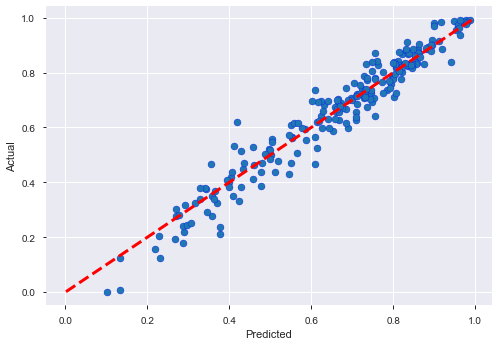

------------------------------------------------------
R2: 0.9445671342074494
MAE (Mean Absolute Error):  0.03783571091090909
MAPE (Mean Absolute Percentage Error):  0.5768126399069085
MSE (Mean Square Error):  0.0026904251736030605
RMSE (Root Mean Square Error):  0.051869308589984696
Max Error:  0.20654046859999997

Actual vs Predicted:


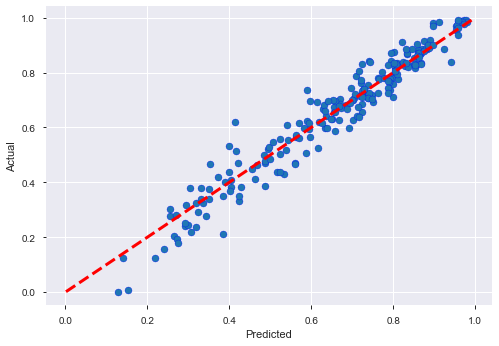

In [35]:
from sklearn.neighbors import KNeighborsRegressor

y=df['Inconnues']
X=df.drop("Inconnues", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

for k in range(1,6):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("------------------------------------------------------")
    print("R2:",r2_score(y_test, y_pred))
    print("MAE (Mean Absolute Error): ", mean_absolute_error(y_test, y_pred))
    print("MAPE (Mean Absolute Percentage Error): ", mean_absolute_percentage_error(y_test, y_pred))
    print("MSE (Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=True))
    print("RMSE (Root Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=False))
    print("Max Error: ", max_error(y_test, y_pred))
    print("")
    print("Actual vs Predicted:")
    fig, ax = plt.subplots()
    ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.show()

## 4) Random Forest

------------------------------------------------------
For max_depth= 1
R2: 0.7787057415449606
MAE (Mean Absolute Error):  0.08915063320645912
MAPE (Mean Absolute Percentage Error):  0.4915525240165917
MSE (Mean Square Error):  0.011780880972955286
RMSE (Root Mean Square Error):  0.10853976678137504
Max Error:  0.38748700212523773

Actual vs Predicted:


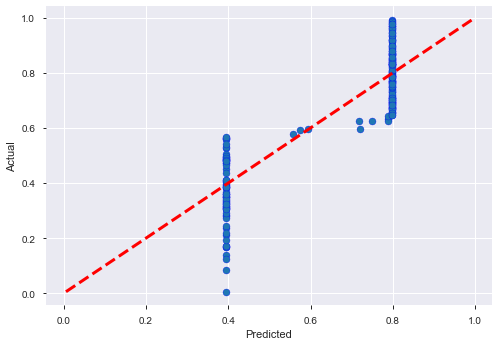

------------------------------------------------------
For max_depth= 5
R2: 0.9929331156104644
MAE (Mean Absolute Error):  0.014175164976186929
MAPE (Mean Absolute Percentage Error):  0.06653206631673428
MSE (Mean Square Error):  0.0003762145679874015
RMSE (Root Mean Square Error):  0.019396251390085703
Max Error:  0.07488867159298554

Actual vs Predicted:


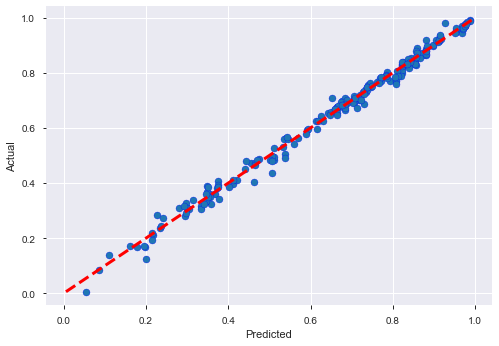

------------------------------------------------------
For max_depth= 10
R2: 0.9938612416035196
MAE (Mean Absolute Error):  0.01307845029211649
MAPE (Mean Absolute Percentage Error):  0.06083353094890638
MSE (Mean Square Error):  0.0003268046016899196
RMSE (Root Mean Square Error):  0.0180777377370599
Max Error:  0.07027830671666685

Actual vs Predicted:


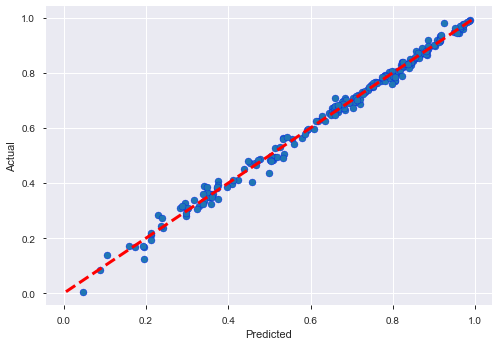

------------------------------------------------------
For max_depth= 20
R2: 0.9938257386667797
MAE (Mean Absolute Error):  0.01303631239622731
MAPE (Mean Absolute Percentage Error):  0.06080829196223292
MSE (Mean Square Error):  0.00032869464562889413
RMSE (Root Mean Square Error):  0.018129937827496657
Max Error:  0.07035487169000018

Actual vs Predicted:


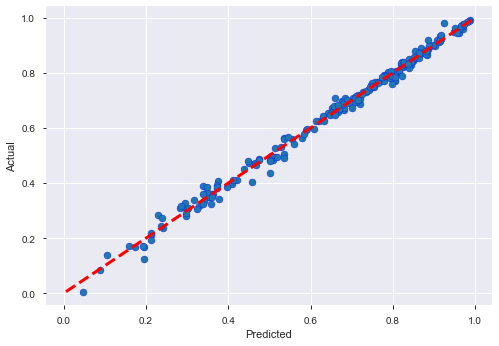

------------------------------------------------------
For max_depth= 100
R2: 0.9938252682268862
MAE (Mean Absolute Error):  0.013037981188909128
MAPE (Mean Absolute Percentage Error):  0.060810035881625896
MSE (Mean Square Error):  0.000328719690094256
RMSE (Root Mean Square Error):  0.01813062850797666
Max Error:  0.07035487169000018

Actual vs Predicted:


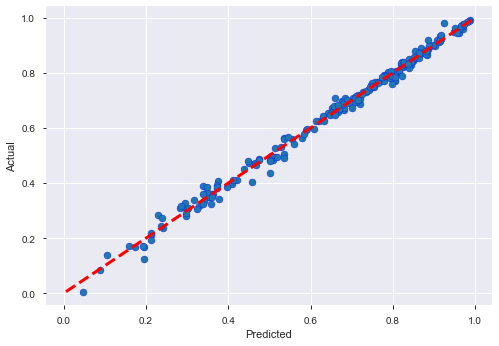

In [24]:
from sklearn.ensemble import RandomForestRegressor

y=df['Inconnues']
X=df.drop("Inconnues", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

for i in (1,5,10,20,100):
    model=RandomForestRegressor(max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("------------------------------------------------------")
    print("For max_depth=", i)
    print("R2:",r2_score(y_test, y_pred))
    print("MAE (Mean Absolute Error): ", mean_absolute_error(y_test, y_pred))
    print("MAPE (Mean Absolute Percentage Error): ", mean_absolute_percentage_error(y_test, y_pred))
    print("MSE (Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=True))
    print("RMSE (Root Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=False))
    print("Max Error: ", max_error(y_test, y_pred))
    print("")
    print("Actual vs Predicted:")
    fig, ax = plt.subplots()
    ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.show()

## 5) LightGBM (LGBM)

------------------------------------------------------
R2: 0.9935429109098248
MAE (Mean Absolute Error):  0.012779317553492594
MAPE (Mean Absolute Percentage Error):  0.028731100370463825
MSE (Mean Square Error):  0.0003174708911958492
RMSE (Root Mean Square Error):  0.017817712849741662
Max Error:  0.06041318173687946

Actual vs Predicted:


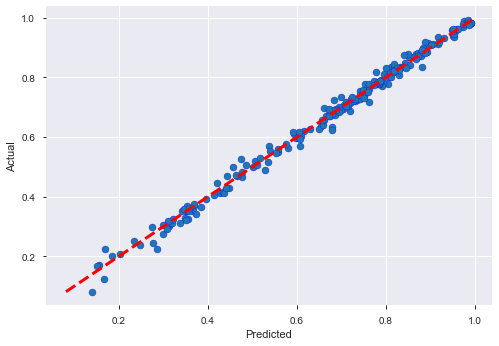

In [23]:
from lightgbm import LGBMRegressor

y=df['Inconnues']
X=df.drop("Inconnues", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model = LGBMRegressor(n_jobs=5, random_state=0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("------------------------------------------------------")
print("R2:",r2_score(y_test, y_pred))
print("MAE (Mean Absolute Error): ", mean_absolute_error(y_test, y_pred))
print("MAPE (Mean Absolute Percentage Error): ", mean_absolute_percentage_error(y_test, y_pred))
print("MSE (Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=True))
print("RMSE (Root Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=False))
print("Max Error: ", max_error(y_test, y_pred))
print("")
print("Actual vs Predicted:")
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [5]:
df1 = pd.read_csv("rossmanLIGHT.csv", low_memory=True, sep=",")

In [6]:
display(df1)

,GOAL: Sales,Store,DayOfWeek,Customers,Promo,StateHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,5961,928,3,551,0,0,3,2,1090.0,9.0,2013.0,1,31.0,2013.0,1
1,11957,826,4,1005,1,0,0,2,7980.0,6.0,2005.0,0,0.0,2011.0,0
2,7433,65,1,609,1,0,0,2,13840.0,5.0,2010.0,1,1.0,2012.0,0
3,7492,760,1,1387,0,0,0,0,560.0,1.0,2011.0,0,0.0,2011.0,0
4,7138,334,4,739,1,0,3,2,4040.0,8.0,2008.0,1,18.0,2013.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10167,0,287,7,0,0,0,2,0,2740.0,5.0,2009.0,1,40.0,2014.0,0
10168,5759,582,5,811,0,0,0,0,120.0,9.0,2013.0,0,0.0,2011.0,0
10169,6852,349,6,641,0,0,2,2,1490.0,4.0,2009.0,0,0.0,2011.0,0
10170,8426,907,1,951,1,0,0,2,250.0,9.0,2013.0,0,0.0,2011.0,0
